In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [2]:
df = load_boston()

In [3]:
df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
df.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [5]:
df_boston = pd.DataFrame(df.data, columns = df.feature_names)

In [6]:
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [7]:
df.target.shape

(506,)

In [8]:
df_boston['PRICE'] = df.target

In [9]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [11]:
df_boston.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [12]:
X = df_boston.iloc[:,:-1]
y = df_boston.iloc[:,-1]

In [13]:
X.shape

(506, 13)

In [14]:
y.shape

(506,)

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0, test_size = .25)

### 1.Gratient Boosting Algorithm

In [16]:
params = {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 4,
          'learning_rate': 0.01, 'loss': 'ls'}
model = GradientBoostingRegressor(**params)

In [17]:
model.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, min_samples_split=4,
                          n_estimators=500)

In [18]:
score = model.score(X_train,y_train).round(3)
print("Training score of GradientBoosting is :",score)

Training score of GradientBoosting is : 0.994


In [19]:
print("the test score of GradienBoosting is :",model.score(X_test,y_test).round(3))

the test score of GradienBoosting is : 0.829


In [20]:
y_pred = model.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 13.94
Test Variance score: 0.83


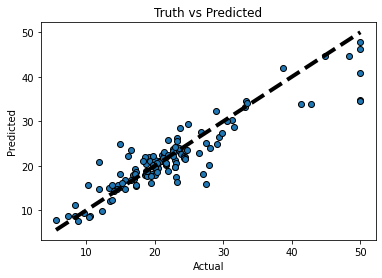

In [21]:
# So let's run the model against the test data
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Truth vs Predicted")
plt.show()

### 2. Random Forest 

In [22]:
paramsrf = { 'n_estimators':500,
    'max_depth':5,
    'min_samples_split':2,
 }
rfr = RandomForestRegressor(**paramsrf)

In [23]:
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=500)

In [24]:
y_pred = rfr.predict(X_test)

In [25]:
print("The score of training is :", rfr.score(X_train,y_train).round(3))
print("The score of testing set is :",rfr.score(X_test,y_test).round(3))

The score of training is : 0.95
The score of testing set is : 0.79


In [26]:
print('The  mean squred error is: ',mean_squared_error(y_test,y_pred))
print('the test score variance is: ',r2_score(y_test,y_pred))

The  mean squred error is:  17.125860467201353
the test score variance is:  0.7903786186971689


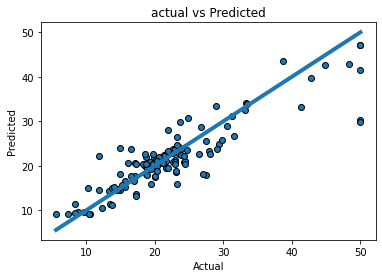

In [27]:
fig,ax = plt.subplots()
plt.scatter(y_test,y_pred,edgecolors=(0,0,0))
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("actual vs Predicted")
plt.show()

### 3.Linear Regression

In [28]:
linear = LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [29]:
y_pred = linear.predict(X_test)

In [30]:
y_pred[:5]

array([24.95233283, 23.61699724, 29.20588553, 11.96070515, 21.33362042])

In [31]:
print("The score of training is :", linear.score(X_train,y_train).round(3))
print("The score of testing set is :",linear.score(X_test,y_test).round(3))

The score of training is : 0.77
The score of testing set is : 0.635


In [32]:
print('The  mean squred error is: ',mean_squared_error(y_test,y_pred))
print('the test score variance is: ',r2_score(y_test,y_pred))

The  mean squred error is:  29.782245092302336
the test score variance is:  0.6354638433202133


### 4.Support vector machine

In [33]:
paramssvm = {'kernel':'linear',
    'degree':3,
    'gamma':'scale',
    'coef0':0.0,
    'C':1.0,
    'max_iter':-1,}
svm = SVR(**paramssvm)

In [34]:
svm.fit(X_train,y_train)

SVR(kernel='linear')

In [35]:
y_pred = svm.predict(X_test)

In [36]:
y_pred[:5]

array([24.23397007, 20.38130771, 26.06305355, 10.17589224, 20.44081167])

In [37]:
print("The score of training is :", svm.score(X_train,y_train).round(3))
print("The score of testing set is :",svm.score(X_test,y_test).round(3))

The score of training is : 0.744
The score of testing set is : 0.564


In [38]:
print('The  mean squred error is: ',mean_squared_error(y_test,y_pred))
print('the test score variance is: ',r2_score(y_test,y_pred))

The  mean squred error is:  35.657705991432444
the test score variance is:  0.5635479105806482


### 5. Conclusion
we can see that the performence of Gradient Boosting algorithm is better than all other algorithim hence we opt for that one.